In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/naver_keword.csv')
df.head()

,날짜,제목,내용,url
0,2021. 1. 4. 15:08,제주여행 동쪽으로 돌기 첫날 오후-월정리해변,코로나때문에 어디다녀오지도 못하니 어렵게 다녀온 제주여행이나 천천히 썰을 풀어야지요...,https://blog.naver.com/goldqkd/222195906781
1,2021. 1. 18. 14:53,"20201030-1101, 2박3일 제주여행 w 하루팸",2020-10-30부터\n2020-11-1\n제주여행 스타트\n 퇴근 후 출발 예정...,https://blog.naver.com/meheej/222211289488
2,2021. 1. 17. 7:00,제주 여행준비 67편 - 아이와 함께 가볼만한 곳 : 아침미소목장 이용정보,제주 여행준비 67편 - 아침미소목장00 :: \n이제 거짐 아이와 함께 갈 수 있...,https://blog.naver.com/houself/222209329150
3,2021. 1. 1. 1:36,"제주 여행코스 - 실내,실외 관광지 '스누피가든'",지난해.. 이젠 20년도 과거형이 돼버렸습니다. 여름 그 사이쯤 방문했던 날입니다....,https://blog.naver.com/jeju_blue/222192179630
4,2021. 1. 27. 7:00,제주 여행 추천 걷기 좋고 멋진 제주도 새별오름,제주 여행코스 중에서 억새가 멋진 장소인 제주오름 풍경제주도을 좋아하기 때문에 일년...,https://blog.naver.com/bl85219/222214064146


## 1. wordcloud

### 1-1. Preprocessing

In [269]:
# 영어, 숫자, 특수기호 제거
import re

text_prep = df['내용'].str.replace("[^ㅏ-ㅣ가-힣. ]", " ")
df['text_prep'] = text_prep

/var/folders/fw/9gdbjd851zl94gbm7f96rmcm0000gn/T/ipykernel_968/1361200566.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  text_prep = df['내용'].str.replace("[^ㅏ-ㅣ가-힣. ]", " ")


### 1-2. Tokenizing

In [270]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum
from konlpy.tag import Mecab

mecab = Mecab()

text_corpus = [mecab.nouns(str(corpus)) for corpus in text_prep]

In [271]:
# 1글자 제거
tokenized_text = []
for token_text in text_corpus:
    token_text = [word for word in token_text if len(word) > 1]
    tokenized_text.append(token_text)
    
print(tokenized_text[0])

['코로나', '때문', '어디', '제주', '여행', '일정', '오후', '제주도', '동쪽', '돌기', '월정리', '해변', '제주도', '바다', '월정리', '해변', '뭔가', '여유', '자유', '느낌', '주차장', '중요', '월정리', '해변', '주차장', '무료', '주차', '저희', '가족', '사람', '사진', '뒷모습', '구름', '사진', '서핑', '가족', '사람', '다행', '월정리', '해변', '산책', '정오', '월정리', '수제', '버거', '신랑', '가게', '주차', '경치', '힐링', '힐링', '사진', '반대쪽', '월정리', '정오', '오픈', '대기', '수제', '버거', '펜션', '바다', '도로', '다음', '제주', '여행', '숙소', '생각', '패스', '정면', '수제', '버거', '고민', '검색', '우도', '우도', '월정리', '오픈', '주문', '전화', '오픈', '주문', '접수', '오픈', '오더', '오픈', '시간', '손님', '전화', '주문', '상태', '포장', '자리', '주문', '전화', '사람', '버거', '모양', '간판', '왼쪽', '스탭', '오른쪽', '내부', '구석', '한쪽', '창문', '안쪽', '바다', '여긴', '아무', '정도', '사람', '입구', '바다', '메뉴', '상태', '우도', '땅콩', '돼지', '버거', '우버', '한라', '레몬', '이드', '누난', '드라이브', '해녀', '쉼터', '아무', '정자', '여기', '경치', '풍력', '발전기', '여유', '점심', '식사', '시작', '하하호', '호수', '버거', '그림', '왼쪽', '우도', '땅콩', '돼지', '버거', '오른쪽', '우버', '나이프', '커트', '커트', '수제', '버거', '내용물', '딸아', '신랑', '우도', '땅콩', '돼지', '버거', '만족', '버거', '일정',

In [272]:
df['tokenized_text'] = tokenized_text

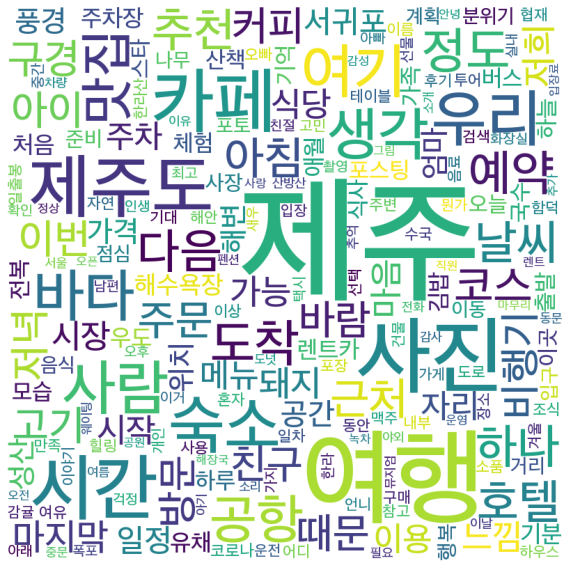

In [273]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rc('font', family='Apple SD Gothic Neo')

import re
import collections
import itertools

# 하나의 리스트로 합치기
flatten_text = list(itertools.chain(*tokenized_text))

word_could_dict = collections.Counter(flatten_text)
stopwords = ['제주', '제주도']

wc1 = WordCloud(max_font_size=200, font_path='/Library/Fonts/AppleSDGothicNeoM.ttf',
                background_color='white', width=800, height=800, stopwords=stopwords)

plt.figure(figsize=(10, 8))
plt.imshow(wc1.generate_from_frequencies(word_could_dict))
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [274]:
import operator

sdict = sorted(word_could_dict.items(), key=operator.itemgetter(1), reverse=True)
sdict[:30]

[('제주', 144810),
 ('여행', 75236),
 ('사진', 46773),
 ('시간', 33845),
 ('카페', 32866),
 ('제주도', 31673),
 ('숙소', 25907),
 ('우리', 24629),
 ('사람', 23216),
 ('여기', 22776),
 ('바다', 21181),
 ('생각', 21011),
 ('맛집', 18276),
 ('공항', 17653),
 ('도착', 15845),
 ('정도', 15382),
 ('예약', 14608),
 ('다음', 14394),
 ('추천', 14104),
 ('하나', 13904),
 ('날씨', 13794),
 ('호텔', 13614),
 ('아침', 12594),
 ('코스', 12250),
 ('근처', 12202),
 ('주문', 11131),
 ('때문', 10930),
 ('이번', 10701),
 ('고기', 10642),
 ('아이', 10631)]

## 2. 월별 '여행' 키워드 검색 변화량

In [275]:
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221603462366
df['날짜'] = pd.to_datetime(df['날짜'], infer_datetime_format=True)
df['날짜'] = pd.to_datetime(df['날짜'].dt.date) # YYYY-MM-DD(문자)
df['month'] = df['날짜'].dt.month        # 월(숫자)

In [276]:
df_2101 = df[df['month']==1]
df_2102 = df[df['month']==2]
df_2103 = df[df['month']==3]
df_2104 = df[df['month']==4]
df_2105 = df[df['month']==5]
df_2106 = df[df['month']==6]

In [277]:
df2101_text = list(itertools.chain(*df_2101['tokenized_text']))
df2101_dict = collections.Counter(df2101_text)

df2102_text = list(itertools.chain(*df_2102['tokenized_text']))
df2102_dict = collections.Counter(df2102_text)

df2103_text = list(itertools.chain(*df_2103['tokenized_text']))
df2103_dict = collections.Counter(df2103_text)

df2104_text = list(itertools.chain(*df_2104['tokenized_text']))
df2104_dict = collections.Counter(df2104_text)

df2105_text = list(itertools.chain(*df_2105['tokenized_text']))
df2105_dict = collections.Counter(df2105_text)

df2106_text = list(itertools.chain(*df_2106['tokenized_text']))
df2106_dict = collections.Counter(df2106_text)

In [278]:
keyword_cnt = []

keyword_cnt.append(df2101_dict['여행'])
keyword_cnt.append(df2102_dict['여행'])
keyword_cnt.append(df2103_dict['여행'])
keyword_cnt.append(df2104_dict['여행'])
keyword_cnt.append(df2105_dict['여행'])
keyword_cnt.append(df2106_dict['여행'])

keyword_cnt

[12209, 8502, 12265, 13562, 13742, 14956]

In [279]:
start_date = pd.to_datetime('2021-01') ## 시작 날짜
end_date = pd.to_datetime('2021-07') ## 마지막 날짜

dates = pd.date_range(start_date,end_date,freq='M') ## 일단위로 생성
dates

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', freq='M')

In [280]:
keyword_cnt_df = pd.DataFrame({'Date':dates, 'cnt':keyword_cnt})
keyword_cnt_df

,Date,cnt
0,2021-01-31,12209
1,2021-02-28,8502
2,2021-03-31,12265
3,2021-04-30,13562
4,2021-05-31,13742
5,2021-06-30,14956


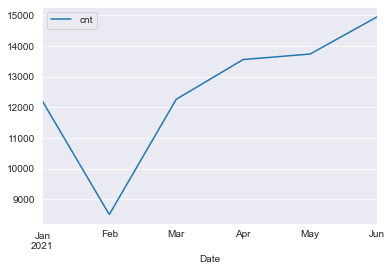

In [281]:
sns.set_style(style='darkgrid')
keyword_cnt_df.plot(x='Date', y='cnt')
plt.show()